In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [47]:
def determine_xlimits(array_to_search, length):
    initial = 0
    for i in range(len(array_to_search)):
        if array_to_search[i] > 0.95:
            initial = i - length/2
            break
    final = i + length/2
    return initial, final

In [3]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

[[''], ['10682', '1000', '682', '682'], ['10683', '1000', '683', '683'], ['10684', '1000', '684', '684'], ['10685', '1000', '685', '685']]
(2000, 4)


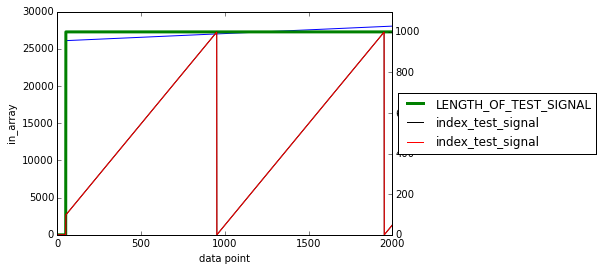

In [40]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='counter')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='LENGTH_OF_TEST_SIGNAL')
ax2.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='index_test_signal')
#ax.set_ylim(-1, 2)
ax2.set_ylim(0,1100)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

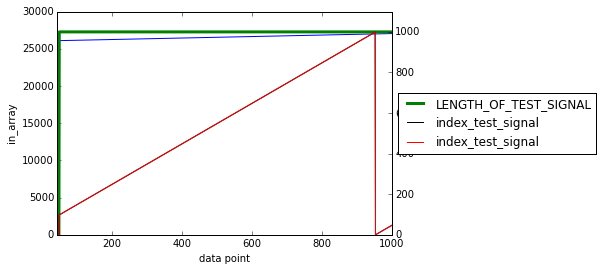

In [42]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='LENGTH_OF_TEST_SIGNAL')
ax2.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='index_test_signal')
#ax.set_ylim(-1, 2)
ax2.set_ylim(0, 1100)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(45,1000)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

[ 108.  109.  110.  111.  112.  113.  114.  115.  116.  117.]


[['0', '538', '0.00'], ['23539', '1000', '539', '0.00'], ['23540', '1000', '540', '0.00'], ['23541', '1000', '541', '0.00'], ['23542', '1000', '542', '0.00']]
(2000, 4)


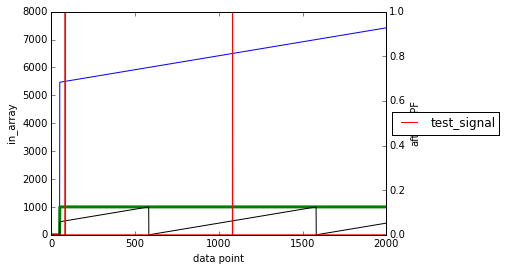

In [45]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='counter')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='length_of_test_signal')
ax.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='test_signal')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

82.0


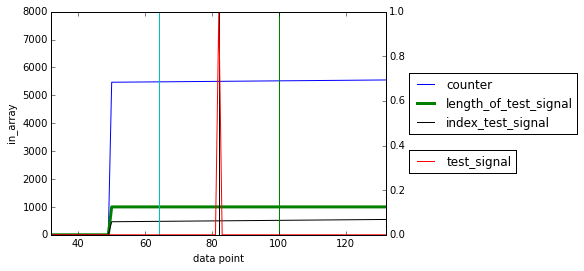

In [56]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='counter')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='length_of_test_signal')
ax.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='test_signal')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,3],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g');